In [1]:
import os
os.chdir("..")

In [11]:
import multi_agent_reinforcement_learning
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import json
import wandb

In [3]:
price_1 = "kind_green_thesis/master2023/dw12qxvo"
price_2 = "kind_green_thesis/master2023/p478p52s"
price_3 = "kind_green_thesis/master2023/71oa7i60"

In [4]:
api = wandb.Api()
run = api.run(price_2)
entries = []
for obs in run.scan_history():
    entries.append(obs)
df = pd.DataFrame(entries)

In [5]:
optimal_policy_idx = np.argmax(df["Best Reward"])

In [148]:
runs = ["p478p52s","lmb4305s"]
api = wandb.Api()
dfs = []
for run_id in runs:
    run = api.run(f"kind_green_thesis/master2023/{run_id}")
    entries = []
    for obs in run.scan_history():
        entries.append(obs)
    df = pd.DataFrame(entries)
    df["name"] = run.name
    dfs.append(df)

In [149]:
df = pd.concat(dfs)

In [165]:
df = pd.DataFrame(dfs[0])
optimal_policy_idx_no_cancel = np.argmax(df["Best Reward"])

In [166]:
df1 = pd.DataFrame(dfs[1])
optimal_policy_idx = np.argmax(df1["Best Reward"])

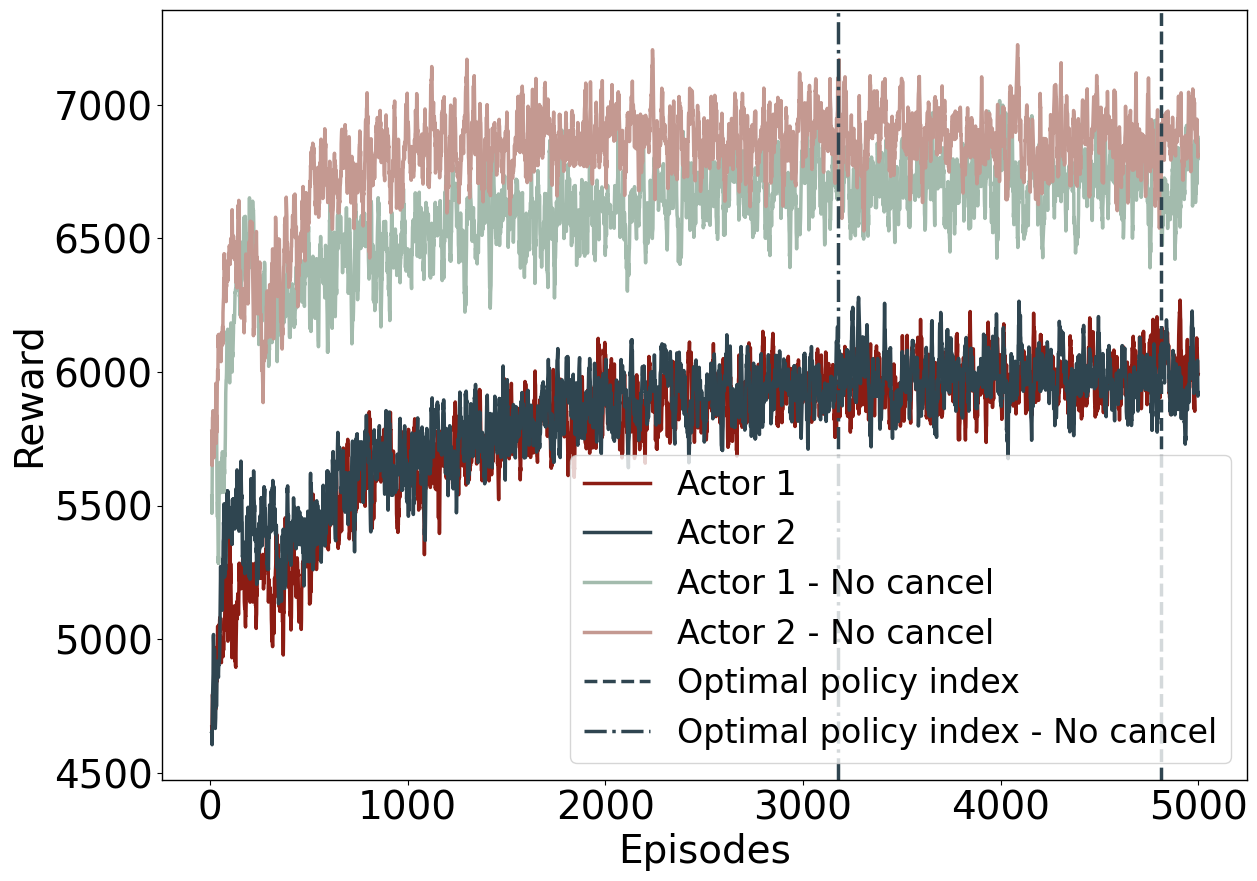

In [171]:
plt.plot(df1["RL_1_SAC_reward"].rolling(window=10).mean(), label="Actor 1")
plt.plot(df1["RL_2_SAC_reward"].rolling(window=10).mean(), label="Actor 2")
plt.plot(df["RL_1_SAC_reward"].rolling(window=10).mean(), label="Actor 1 - No cancel")
plt.plot(df["RL_2_SAC_reward"].rolling(window=10).mean(), label="Actor 2 - No cancel")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.axvline(x=optimal_policy_idx_no_cancel, color="#2F4550", linestyle='-.', label="Optimal policy index - No cancel")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.savefig(f"figs/cancel_no_cancel_reward_per_actor.png")
plt.show()

In [140]:
def get_plot_data(runs, column, base_name="No-actor 1"):
    mean, sd = [], []
    for run in runs:
        with open(f"run_stats/{base_name}{run}.json", "r") as f:
            data = json.load(f)
        mean.append(np.mean(list(data[f"mean_{column}"].values()), axis=0))
        sd.append(np.mean(list(data[f"std_{column}"].values()), axis=0))
    return mean, sd
    

In [141]:
def get_plot(column):
    runs = ["_400", "_374", "_300", "_200", " 187", "_100"][::-1]
    no_cars = ["400", "374", "300", "200", "187", "100"][::-1]
    mean, sd = get_plot_data(runs, column, base_name="no_cars")
    plt.bar(no_cars, mean)
    for i in range(len(no_cars)):
        plt.vlines(i, mean[i] - 1.96*sd[i], mean[i]+ 1.96*sd[i], color="#2F4550")
    plt.xlabel("Number of cars")
    plt.ylabel(column.replace("_", " ").capitalize())
    plt.savefig(f"figs/no_cars_vs_{column}_two_cars.png")
    plt.show()

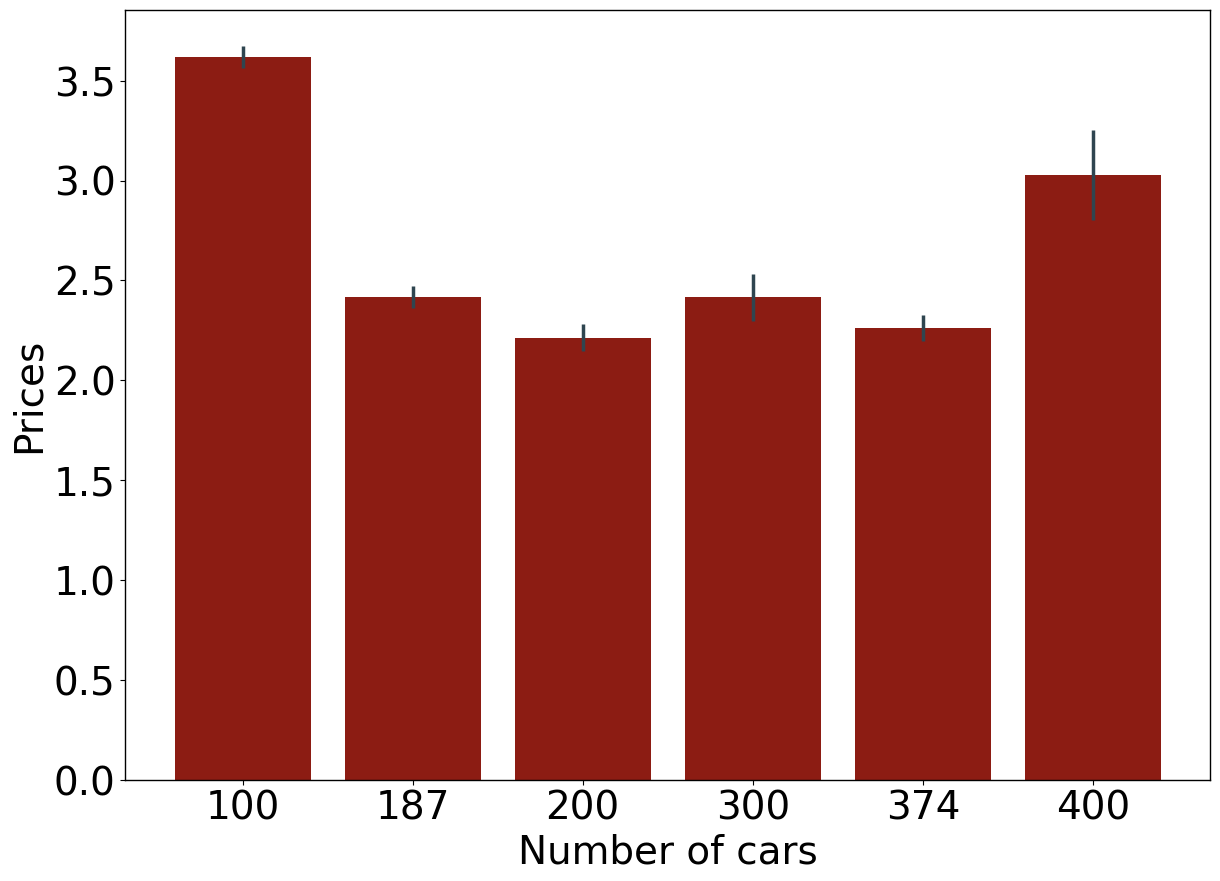

In [142]:
get_plot("prices")

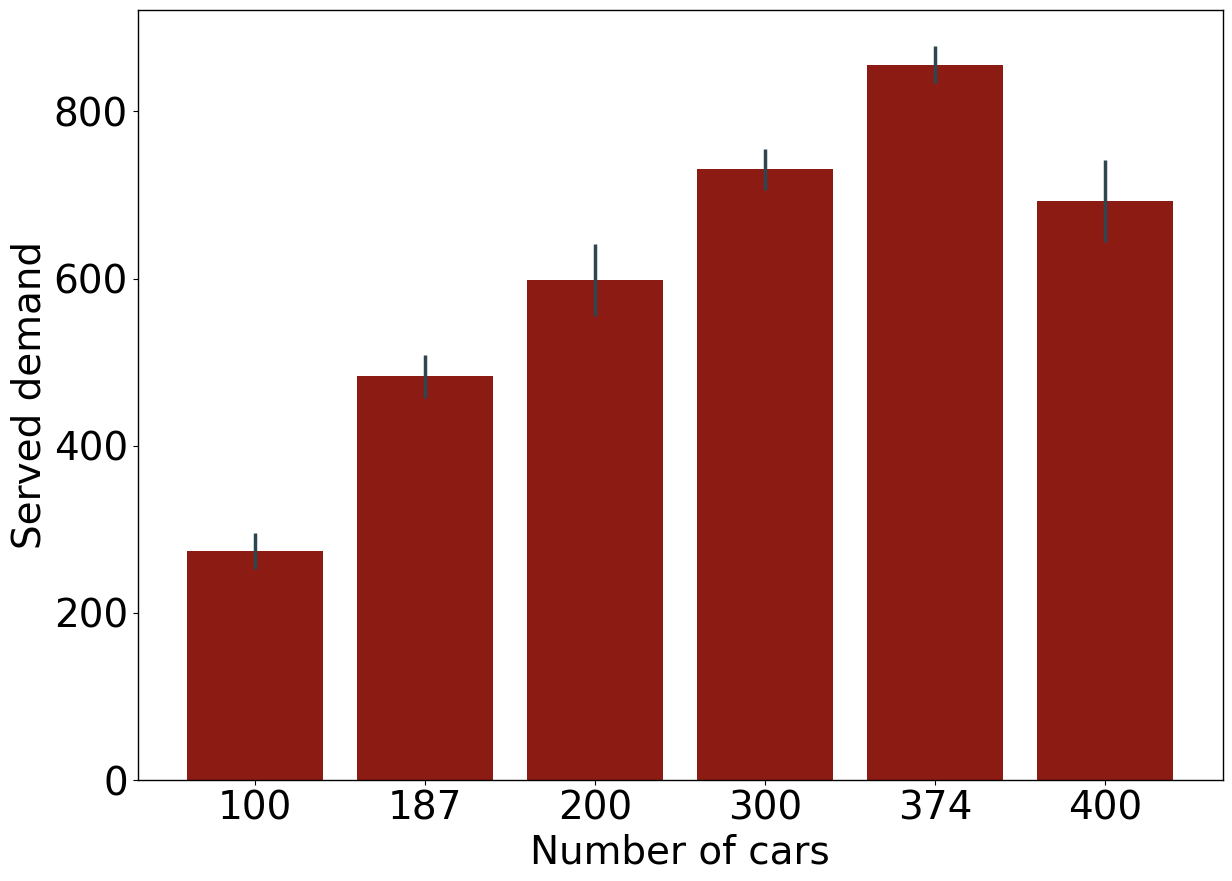

In [136]:
get_plot("served_demand")

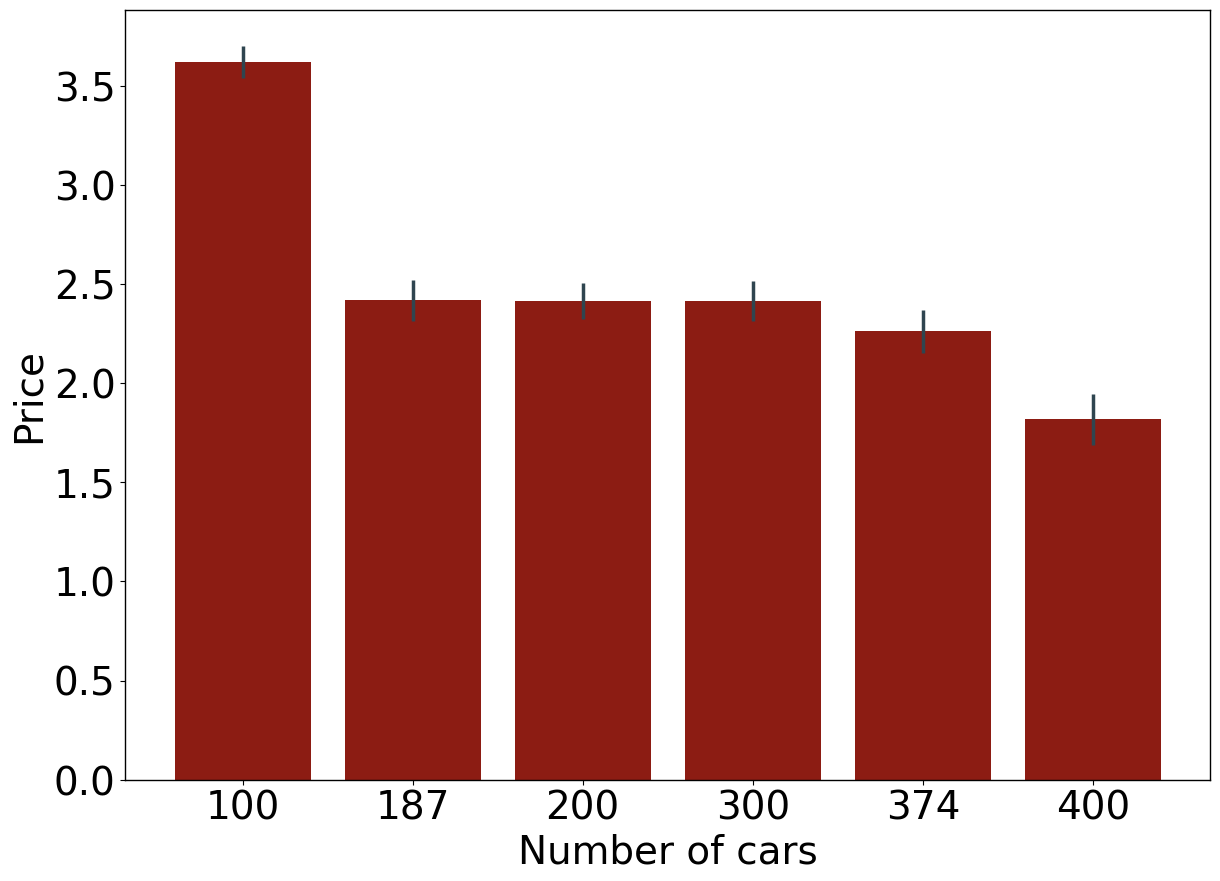

In [143]:
no_cars = ["400", "374", "300", "200", "187", "100"][::-1]
mean_1 = [
    3.3452,
    2.9118,
    2.3317,
    2.3071,
    2.4921,
    1.9691,
]
mean_2 = [
    3.8928,
    1.9239,
    2.4960,
    2.5242,
    2.0306,
    1.6678,
]

sd_1 = [
    0.0406,
    0.0527,
    0.0460,
    0.0508,
    0.0550,
    0.0659,
]

sd_2 = [
    0.0137,
    0.0054,
    0.0645,
    0.0677,
    0.0131,
    0.0211,
]
mean = np.mean([mean_1, mean_2], axis=0)
sd = np.mean([sd_1, sd_2], axis=0)

plt.bar(no_cars, mean)
for i in range(len(no_cars)):
    plt.vlines(i, mean[i] - 1.96*sd_1[i], mean[i]+ 1.96*sd_1[i], color="#2F4550")
plt.xlabel("Number of cars")
plt.ylabel("Price")
plt.savefig(f"figs/no_cars_vs_price_two.png")
plt.show()

In [95]:
with open(f"run_stats/no_cars_400.json", "r") as f:
    data = json.load(f)

In [96]:
data

{'mean_prices': {'0': 2.4438493621349333, '1': 3.610802912712097},
 'mean_served_demand': {'0': 484.5, '1': 208.5},
 'mean_cancelled_demand': {'0': 201.5, '1': 307.8},
 'mean_unmet_demand': {'0': 304.1, '1': 365.2},
 'mean_rewards': {'0': 10840.958453125952, '1': 6397.616267967224},
 'std_prices': {'0': 0.1290555546257943, '1': 0.10151756956212798},
 'std_rewards': {'0': 477.6598819267573, '1': 524.3333258380424},
 'mean_total_reward': 17238.574721093177,
 'mean_total_served_demand': 693.0,
 'mean_total_cancelled_demand': 509.3,
 'mean_total_unmet_demand': 669.3,
 'std_total_reward': 755.114101076616,
 'std_sum_served_demand': 25.105333651990723,
 'std_sum_cancelled_demand': 8.7603272389411,
 'std_sum_unmet_demand': 22.327486796920667}

In [13]:
with open("run_stats/No-actor 1.json", "r") as f:
    data = json.load(f)

In [19]:
data

{'mean_prices': {'0': 2.3991444373130797},
 'mean_served_demand': {'0': 862.0},
 'mean_cancelled_demand': {'0': 319.4},
 'mean_unmet_demand': {'0': 464.6},
 'mean_rewards': {'0': 18926.098880534177},
 'std_served_demand': {'0': 35.82736384385544},
 'std_cancelled_demand': {'0': 17.556765077883796},
 'std_unmet_demand': {'0': 34.800000000000004},
 'std_prices': {'0': 0.022881111220896103},
 'std_rewards': {'0': 866.1871461356063},
 'mean_total_reward': 18926.098880534177,
 'mean_total_served_demand': 862.0,
 'mean_total_cancelled_demand': 319.4,
 'mean_total_unmet_demand': 464.6,
 'std_total_reward': 0,
 'std_sum_served_demand': 0,
 'std_sum_cancelled_demand': 0,
 'std_sum_unmet_demand': 0}

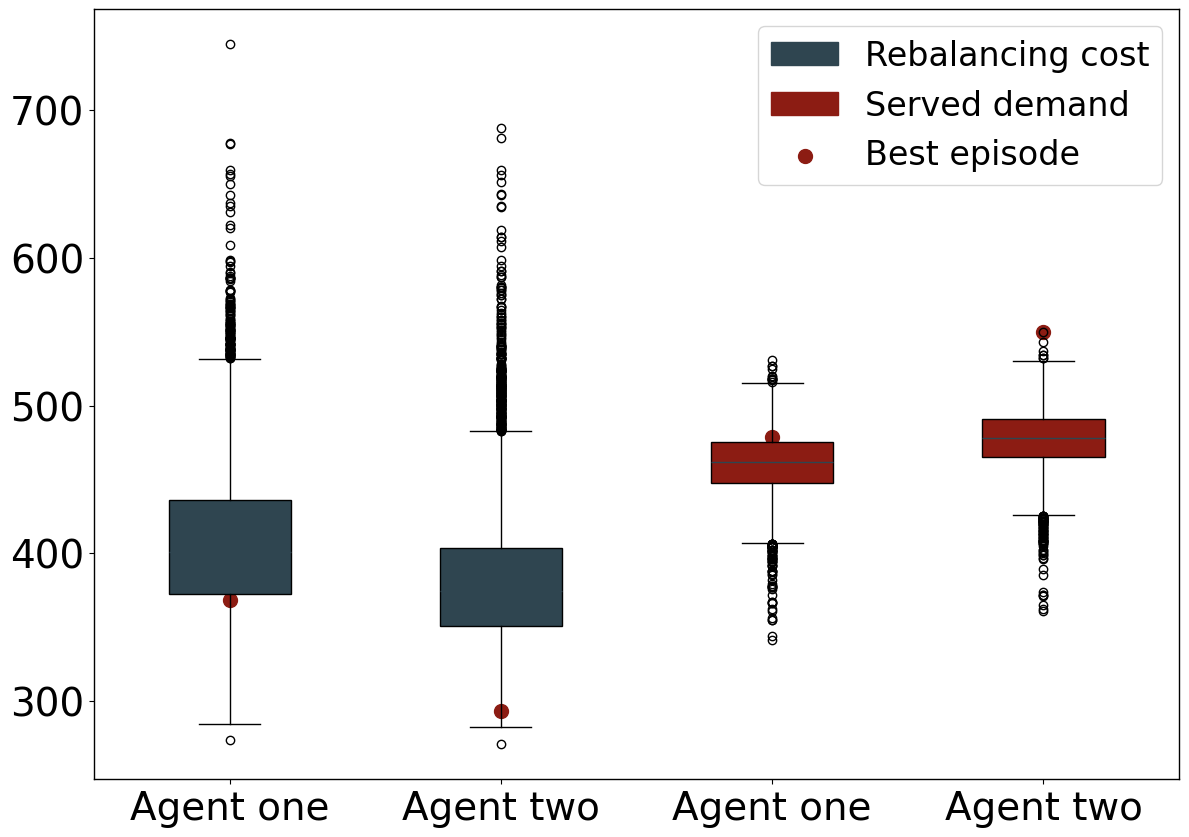

In [44]:
bplot = plt.boxplot(df[["RL_1_SAC_rebalancing_cost", "RL_2_SAC_rebalancing_cost", "RL_1_SAC_served_demand", "RL_2_SAC_served_demand"]], patch_artist=True)
plt.scatter([1,2,3,4], df[["RL_1_SAC_rebalancing_cost", "RL_2_SAC_rebalancing_cost", "RL_1_SAC_served_demand", "RL_2_SAC_served_demand"]].iloc[optimal_policy_idx], s = 100, label="Best episode")
plt.xticks([1,2,3,4], ["Agent one", "Agent two", "Agent one", "Agent two"])
colors = ["#2F4550", "#2F4550", "#8C1C13", "#8C1C13"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Add a single red dot for the legend
plt.scatter([], [], color="#8C1C13", s=100, label="Best episode")

# Create patches for the legend
patch1 = mpatches.Patch(color="#2F4550", label="Rebalancing cost")
patch2 = mpatches.Patch(color="#8C1C13", label="Served demand")

# Create the legend
plt.legend(handles=[patch1, patch2, plt.scatter([], [], color="#8C1C13", s=100)], 
           labels=["Rebalancing cost", "Served demand", "Best episode"], loc="best")

plt.savefig("figs/best_episode_2_sac_box.png")

plt.show()

In [10]:
df.iloc[optimal_policy_idx]

RL_2_SAC_rebalancing_reward      -2.934000e+02
RL_1_SAC_overflow_unmet_demand    5.600000e+01
RL_1_SAC_rebalancing_reward      -3.684000e+02
RL_1_SAC_revenue_reward           7.522000e+03
Best Reward                       1.522720e+04
RL_2_SAC_reward                   8.073600e+03
_timestamp                        1.705258e+09
RL_1_SAC_bus_unmet_demand         0.000000e+00
RL_1_SAC_served_demand            4.790000e+02
RL_1_SAC_total_unmet_demand       5.600000e+01
RL_2_SAC_revenue_reward           8.367000e+03
RL_2_SAC_served_demand            5.500000e+02
RL_2_SAC_bus_unmet_demand         0.000000e+00
RL_2_SAC_overflow_unmet_demand    7.000000e+01
RL_1_SAC_reward                   7.153600e+03
_step                             3.176000e+03
RL_1_SAC_rebalancing_cost         3.684000e+02
RL_2_SAC_total_unmet_demand       7.000000e+01
_runtime                          1.879883e+04
RL_2_SAC_rebalancing_cost         2.934000e+02
Name: 3176, dtype: float64

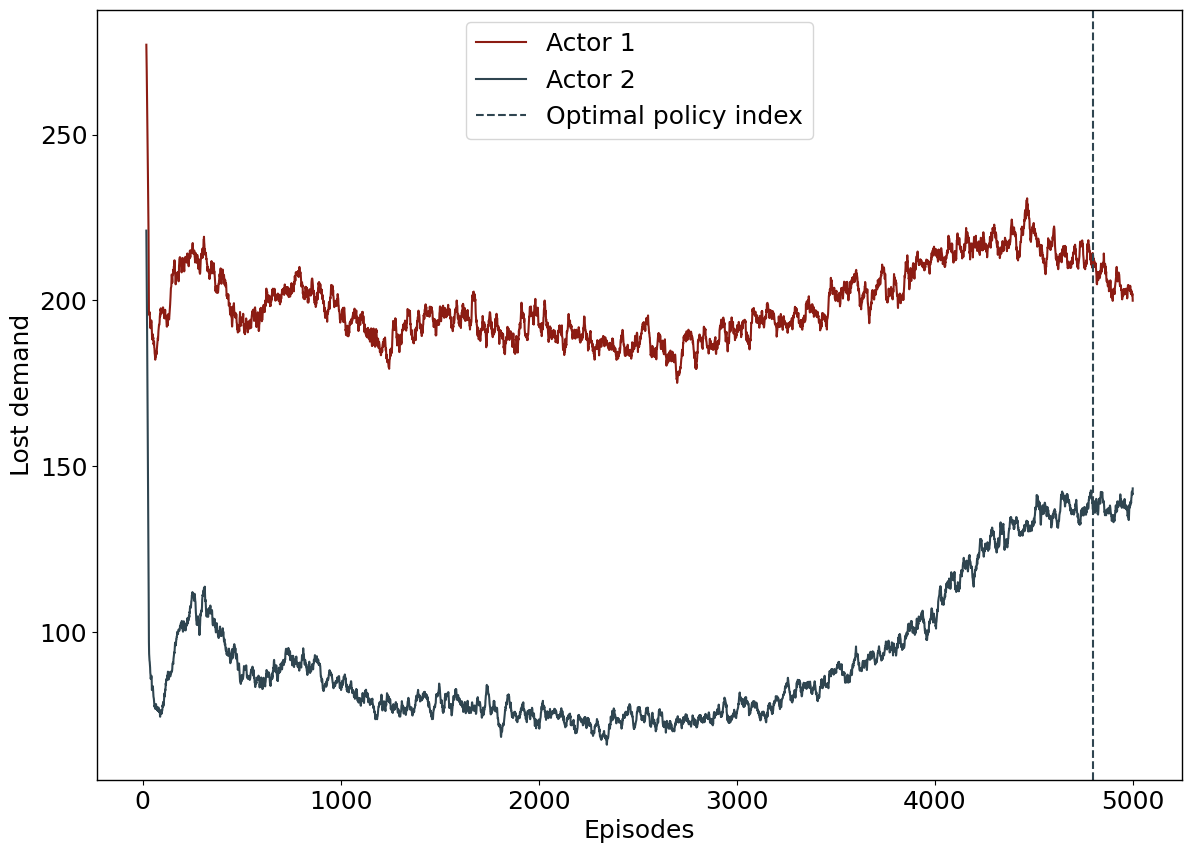

In [8]:
plt.plot(df["RL_1_SAC_bus_unmet_demand"].rolling(window=20).mean(), label="Actor 1")
plt.plot(df["RL_2_SAC_bus_unmet_demand"].rolling(window=20).mean(), label="Actor 2")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Lost demand")
plt.legend()
plt.savefig(f"figs/{run.name}_cancel_unmet_demand.png")
plt.show()

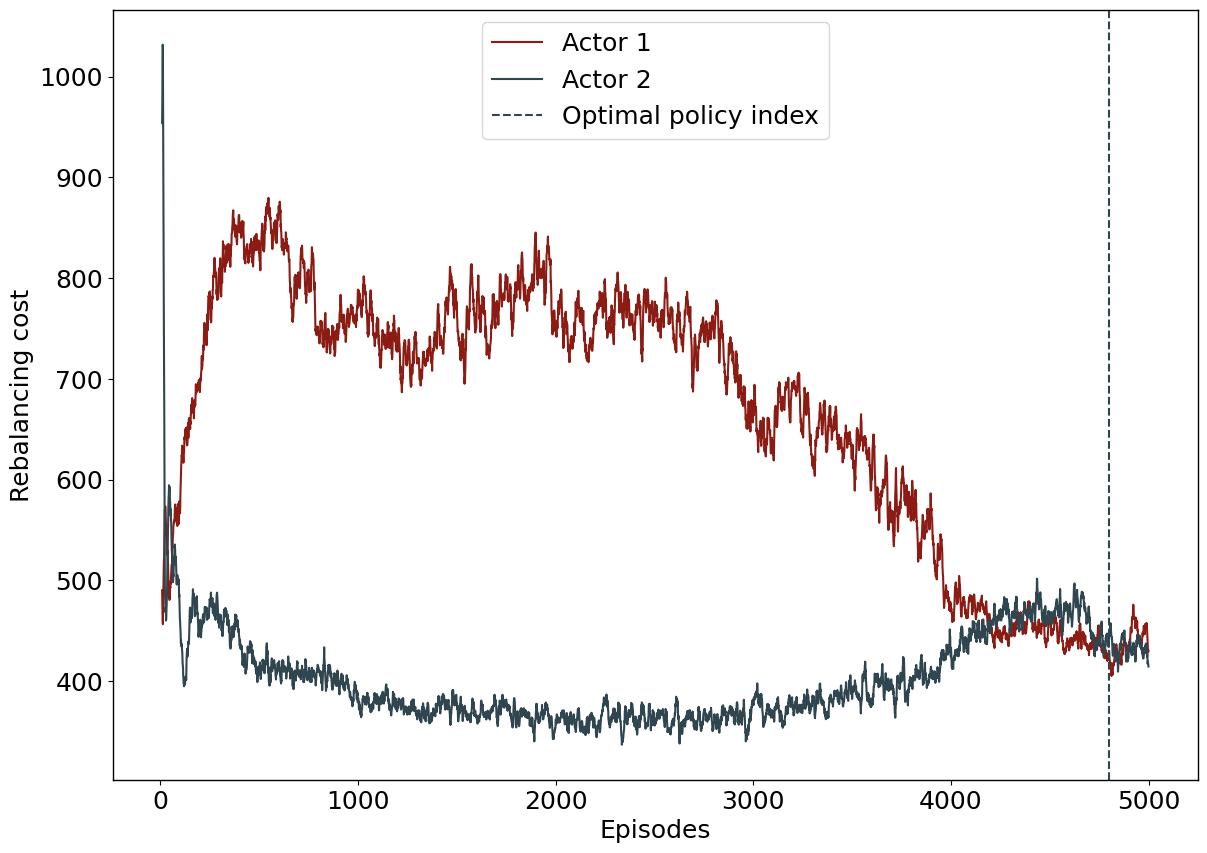

In [9]:
plt.plot(df["RL_1_SAC_rebalancing_cost"].rolling(window=10).mean(), label="Actor 1")
plt.plot(df["RL_2_SAC_rebalancing_cost"].rolling(window=10).mean(), label="Actor 2")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Rebalancing cost")
plt.legend()
plt.savefig(f"figs/{run.name}_rebalancing.png")
plt.show()

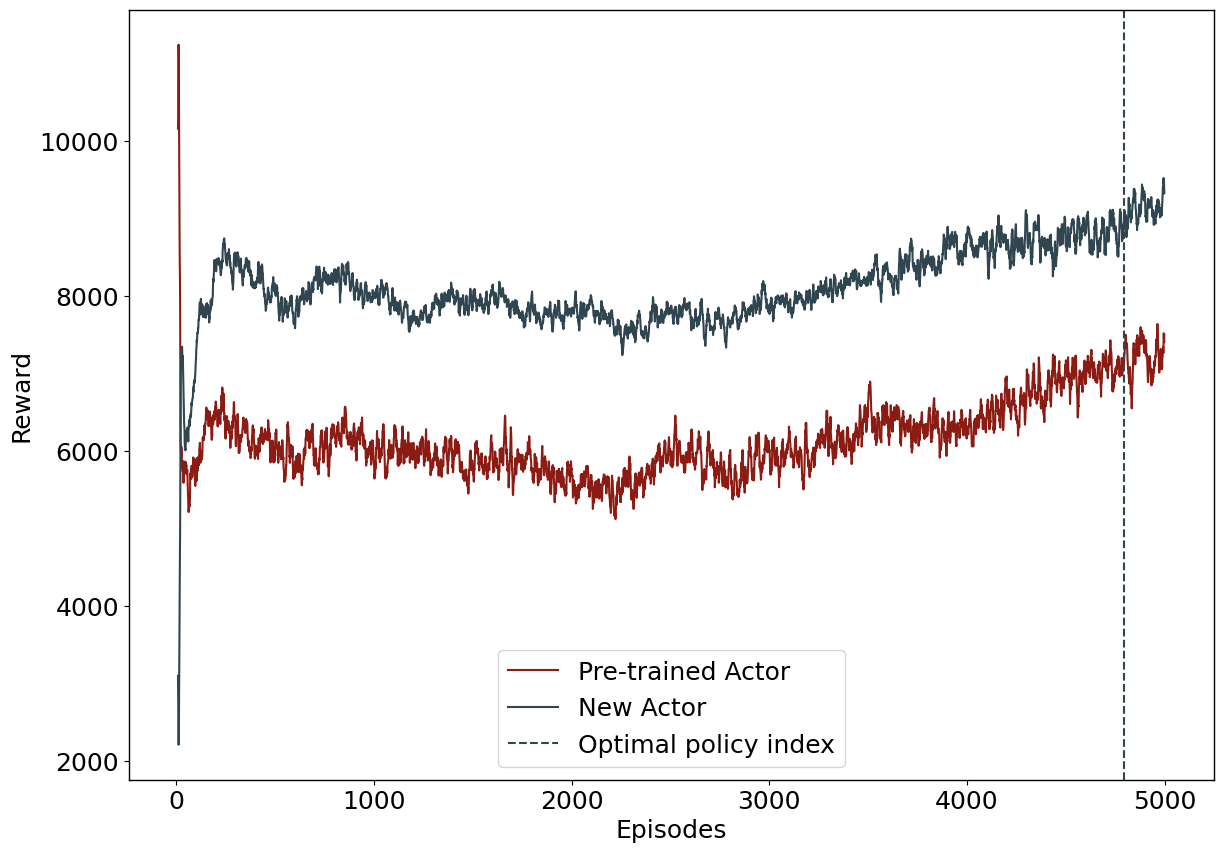

In [16]:
plt.plot(df["RL_1_SAC_reward"].rolling(window=10).mean(), label="Pre-trained Actor")
plt.plot(df["RL_2_SAC_reward"].rolling(window=10).mean(), label="New Actor")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.savefig(f"figs/{run.name}_reward_per_actor.png")
plt.show()

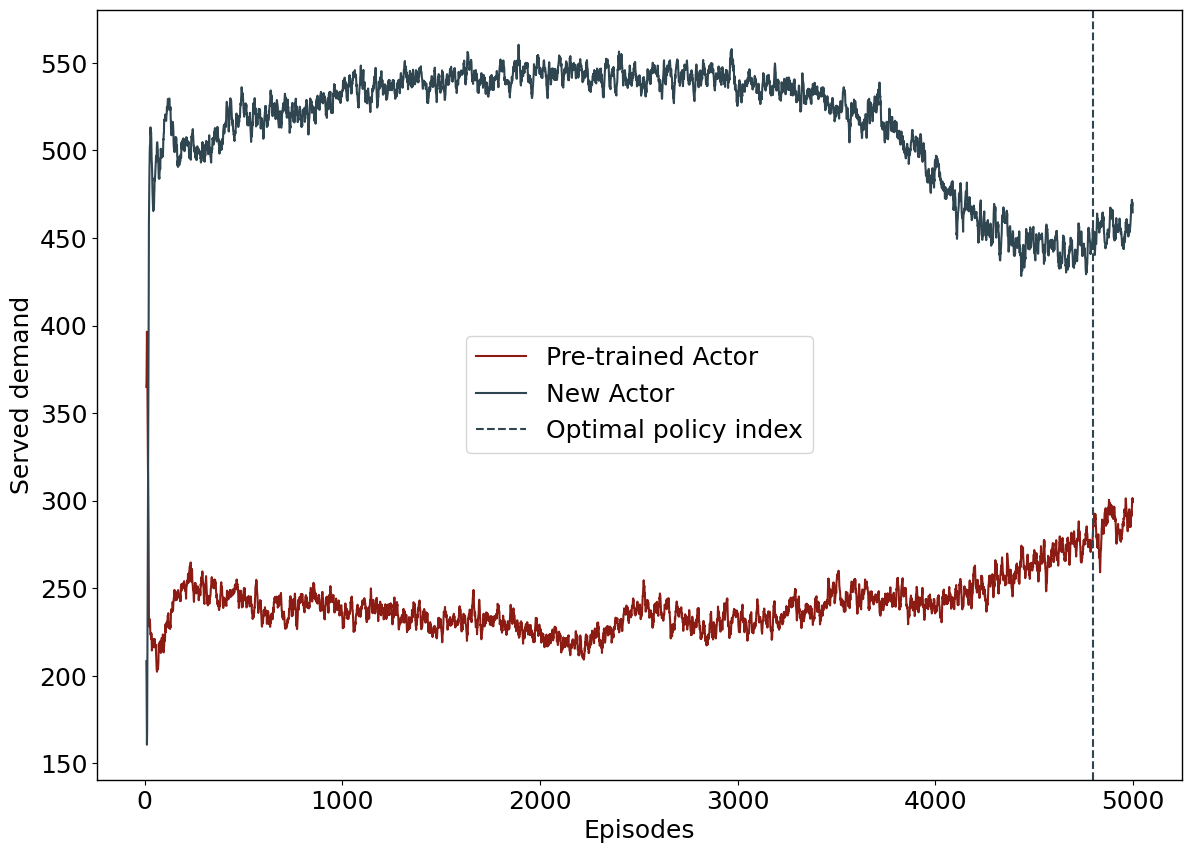

In [17]:
plt.plot(df["RL_1_SAC_served_demand"].rolling(window=10).mean(), label="Pre-trained Actor")
plt.plot(df["RL_2_SAC_served_demand"].rolling(window=10).mean(), label="New Actor")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Served demand")
plt.legend()
plt.savefig(f"figs/{run.name}_served_demand.png")
plt.show()

In [12]:
df.columns

Index(['RL_2_SAC Mean Price', 'Best Reward', 'RL_2_SAC_served_demand', '_step',
       'RL_1_SAC_reward', 'RL_2_SAC_reward', 'RL_1_SAC_rebalancing_cost',
       'RL_1_SAC_total_unmet_demand', 'RL_2_SAC_overflow_unmet_demand',
       'RL_2_SAC_total_unmet_demand', 'RL_1_SAC_overflow_unmet_demand',
       'RL_2_SAC_rebalancing_reward', 'RL_1_SAC_served_demand',
       'RL_1_SAC_revenue_reward', 'RL_1_SAC_rebalancing_reward', '_runtime',
       '_timestamp', 'RL_2_SAC_rebalancing_cost', 'RL_1_SAC_bus_unmet_demand',
       'RL_2_SAC_revenue_reward', 'RL_1_SAC Mean Price',
       'RL_2_SAC_bus_unmet_demand'],
      dtype='object')

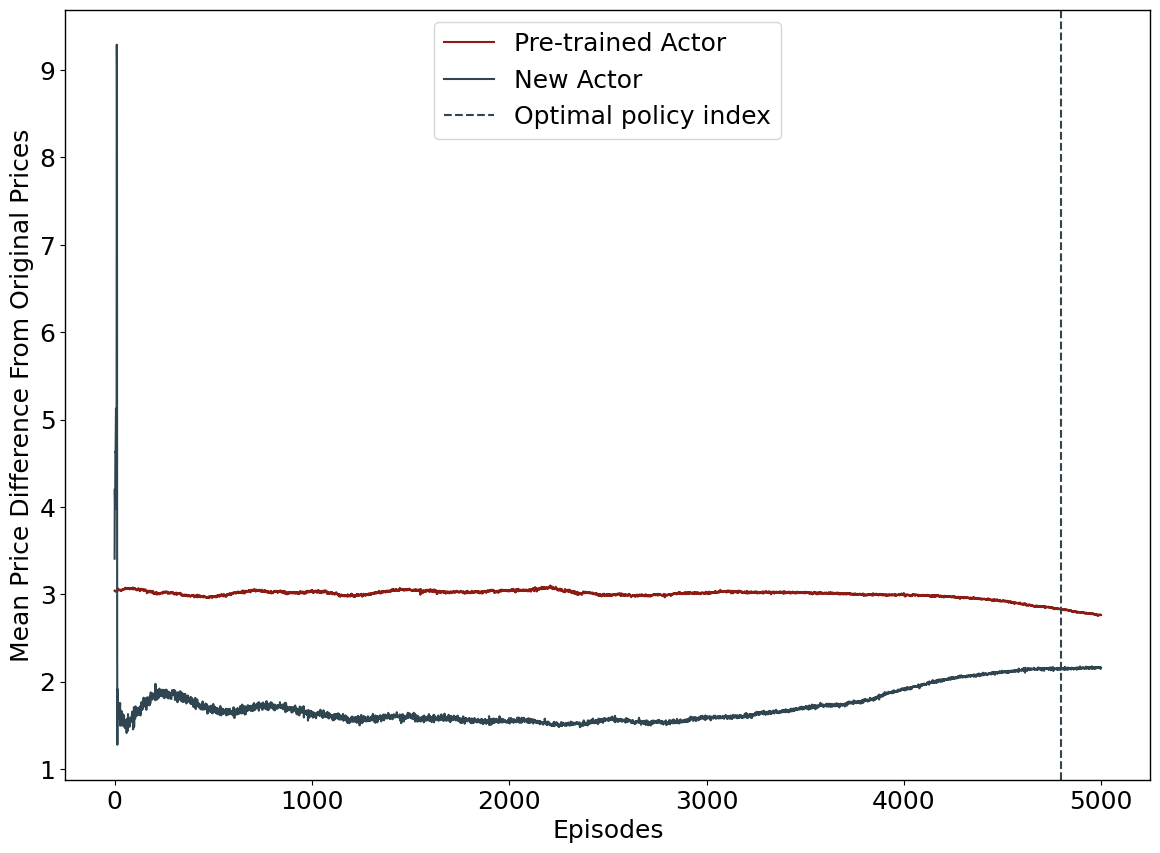

In [18]:
plt.plot(df["RL_1_SAC Mean Price"], label="Pre-trained Actor")
plt.plot(df["RL_2_SAC Mean Price"], label="New Actor")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Mean Price Difference From Original Prices")
plt.legend()
plt.savefig(f"figs/{run.name}_model_prices.png")
plt.show()

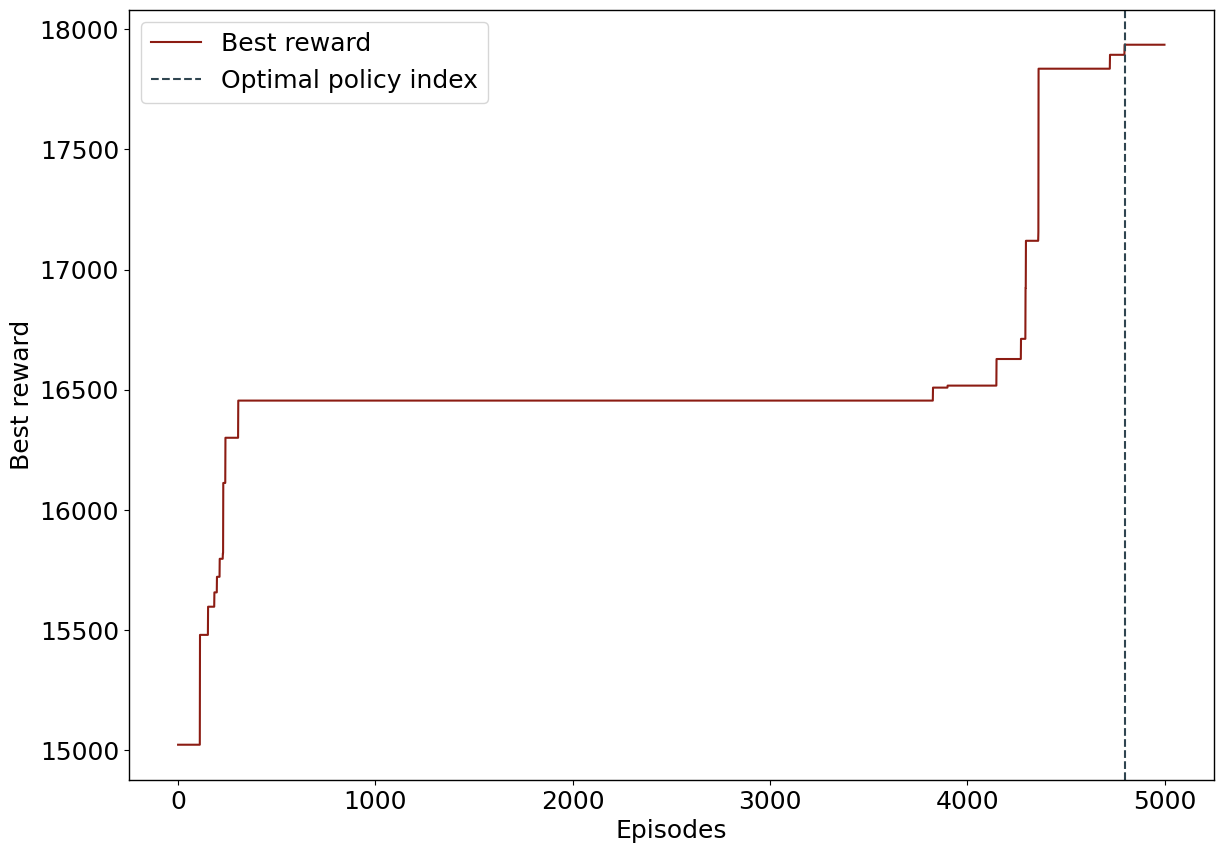

In [14]:
plt.plot(df["Best Reward"], label="Best reward")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Best reward")
plt.legend()
plt.savefig(f"figs/{run.name}_best_reward.png")
plt.show()